In [1]:
import pandas as pd
import numpy as np
import os
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta, date
import operator

from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

C:\Users\Kohei\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/02_data/02_19a/'
path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/03_xgb/03_19ab/'
ver = '03_19ab_xgb'

In [3]:
ID = ['air_store_id','visit_date','flag']
TARGET='visitors'

In [4]:
def RMSLE(y, pred):
    return mean_squared_error(y, pred) ** 0.5

In [5]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

In [6]:
train = pd.read_csv(os.path.join(data_path, 'train2.csv'))

In [11]:
# Variable Selection
cols1 = ['holiday_flg','holiday_flg+1d','holiday_flg-1d','holiday_flg_rev',\
        'dow','month',\
#             'dow_0',
        'dow_1','dow_2','dow_3','dow_4','dow_5','dow_6',\
#             'month_1',
        'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12',\
        'air_genre',\
        'latitude','longitude',\
#             'var_max_lat','var_max_long',\
#             'km_latlong',\
        'air_areaL1_lbl',\
        'air_areaL2_lbl',\
#         'air_areaL3_lbl',\
#             'km_latlong_0',\
        'km_latlong_1','km_latlong_2','km_latlong_3','km_latlong_4','km_latlong_5',\
        'km_latlong_6','km_latlong_7','km_latlong_8','km_latlong_9','km_latlong_10','km_latlong_11',\
#             'air_genre_0','air_genre_1','air_genre_2','air_genre_3','air_genre_4','air_genre_5','air_genre_6','air_genre_7',\
#             'air_genre_8','air_genre_9','air_genre_10','air_genre_11','air_genre_12','air_genre_13',\
#             'km_hpg_latlong',\
        'days_from_first_date',\
        'dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
#         'dow_all_cnt',\
        'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
        'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
        'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
#             'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med','dowhol_rev_all_cnt',\
#             'dowhol_all_med',\
#             'dowhol+1d_all_med',\
#             'dowhol-1d_all_med',\
#         'dowhol_all_cnt',\
#             'dowhol+1d_all_cnt',\
#             'dowhol-1d_all_cnt',\
#             'km_latlong_mean','km_latlong_dow_mean',\
#         'genre_mean','genre_dow_mean',\
#         'areaL1_mean',\
#         'areaL1_dow_mean',\
#         'areaL2_mean',\
#         'areaL2_dow_mean',\
        'areaL3_mean',\
#         'areaL3_dow_mean',\
        'res_ttl','res_cnt','res_mean',\
        'res_hr_std',\
#         'res_std',\
#         'res_hr_dif_sum',\
#         'res_hr_dif_mean',\
        'res_ttl_dow_mean','res_cnt_dow_mean',\
#         'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d',\
        'lag_10d','lag_15d','lag_20d','lag_25d','lag_30d','lag_35d','lag_40d','lag_45d','lag_50d',\
         
        'lag_res_1d','lag_res_2d','lag_res_3d','lag_res_4d','lag_res_5d','lag_res_6d',\
#         'lag_res_10d','lag_res_15d','lag_res_20d',\
#         'lag_res_25d','lag_res_30d','lag_res_35d','lag_res_40d','lag_res_45d','lag_res_50d',\
        'lag_1w',\
        'lag_2w',\
        'lag_3w',\
        'lag_4w',\
        'lag_5w',\
        'lag_6w',\
        'lag_7w',\
        'lag_8w',\
        'lag_9w',\
        'lag_10w',\
        'lag_11w',\
        'lag_12w',\
        'lag_13w',\
        'lag_14w',\
        'lag_15w',\
        'lag_16w',\
        'lag_17w',\
        'lag_18w',\
        'lag_19w',\
        'lag_20w',\
        'lag_res_1w','lag_res_2w','lag_res_3w','lag_res_4w','lag_res_5w',\
        'lag_res_6w','lag_res_7w','lag_res_8w','lag_res_9w','lag_res_10w',\
#         'lag_res_11w','lag_res_12w','lag_res_13w','lag_res_14w','lag_res_15w',\
#         'lag_res_16w','lag_res_17w','lag_res_18w','lag_res_19w','lag_res_20w',\
        'mean_3d','max_3d','min_3d','std_3d',\
        'mean_7d','max_7d','min_7d','std_7d',\
        'mean_14d','max_14d','min_14d','std_14d',\
#         'mean_21d','max_21d','min_21d','std_21d',\
        'mean_28d','max_28d','min_28d','std_28d',\
#         'mean_35d','max_35d','min_35d','std_35d',\
        'mean_42d','max_42d','min_42d','std_42d',\
#             'mean_49d','max_49d','min_49d','std_49d',\
        'mean_56d','max_56d','min_56d','std_56d',\
#             'mean_63d','max_63d','min_63d','std_63d',\
#         'mean_70d','max_70d','min_70d','std_70d',\
#             'mean_77d','max_77d','min_77d','std_77d',\
        'mean_84d','max_84d','min_84d','std_84d',\
#             'scale_to_maxmin_3d','scale_to_std_3d',\
        'scale_to_maxmin_7d','scale_to_std_7d',\
        'scale_to_maxmin_14d','scale_to_std_14d',\
#             'scale_to_maxmin_21d','scale_to_std_21d',\
        'scale_to_maxmin_28d','scale_to_std_28d',\
#             'scale_to_maxmin_35d','scale_to_std_35d',\
#             'scale_to_maxmin_42d','scale_to_std_42d',\
#             'scale_to_maxmin_49d','scale_to_std_49d',\
        'scale_to_maxmin_56d','scale_to_std_56d',\
#             'scale_to_maxmin_63d','scale_to_std_63d',\
#             'scale_to_maxmin_70d','scale_to_std_70d',\
#             'scale_to_maxmin_77d','scale_to_std_77d',\
        'scale_to_maxmin_84d','scale_to_std_84d',\
#             'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
#             'mean_28d-56d','mean_28d-84d','mean_56d-84d',\
        'mean_dow_2w','max_dow_2w','min_dow_2w','std_dow_2w',\
#         'mean_dow_3w','max_dow_3w','min_dow_3w','std_dow_3w',\
        'mean_dow_4w','max_dow_4w','min_dow_4w','std_dow_4w',\
#             'mean_dow_5w','max_dow_5w','min_dow_5w','std_dow_5w',\
        'mean_dow_6w','max_dow_6w','min_dow_6w','std_dow_6w',\
#             'mean_dow_7w','max_dow_7w','min_dow_7w','std_dow_7w',\
#         'mean_dow_8w','max_dow_8w','min_dow_8w','std_dow_8w',\
#             'mean_dow_9w','max_dow_9w','min_dow_9w','std_dow_9w',\
#             'mean_dow_10w','max_dow_10w','min_dow_10w','std_dow_10w',\
#             'mean_dow_2w-4w','mean_dow_2w-6w','mean_dow_2w-8w','mean_dow_2w-10w',\
#         'mean_dow_4w-6w','mean_dow_4w-8w','mean_dow_4w-10w',\
#         'mean_dow_6w-8w','mean_dow_6w-10w','mean_dow_8w-10w',\
        'rainfall','snowfall','wind_max',\
        'weather_daytime',\
        'weather_nighttime',\
#             'weather_daytime2','weather_nighttime2',\
        'weather_daytime_0',\
        'weather_daytime_1',\
#         'weather_daytime_2',\
        'weather_daytime_3',\
        'weather_nighttime_0',\
        'weather_nighttime_1',\
        'weather_nighttime_2',\
        'weather_nighttime_3',\
#         'wind_max_inst',\
#         'rainfall_max1h',\
#         'wind_avg',\
        'temperature_high','temperature_low','temperature_avg',\
#         'snowfall_max',\
#         'humidity_avg',\
#         'daylight_hr',\
#         'na_cnt'
        ]
# add = [c for c in train.columns if "air_areaL1_lbl_" in c]
# cols.extend(add)
# add = [c for c in train.columns if "air_areaL2_lbl_" in c]
# cols.extend(add)
add = [c for c in train.columns if "air_areaL3_lbl_" in c]
cols1.extend(add)

In [12]:
# Variable Selection
cols2 = ['holiday_flg','holiday_flg+1d','holiday_flg-1d','holiday_flg_rev',\
        'dow','month',\
#             'dow_0',
        'dow_1','dow_2','dow_3','dow_4','dow_5','dow_6',\
#             'month_1',
        'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12',\
        'air_genre',\
        'latitude','longitude',\
#             'var_max_lat','var_max_long',\
#             'km_latlong',\
        'air_areaL1_lbl',\
        'air_areaL2_lbl',\
#         'air_areaL3_lbl',\
#             'km_latlong_0',\
        'km_latlong_1','km_latlong_2','km_latlong_3','km_latlong_4','km_latlong_5',\
        'km_latlong_6','km_latlong_7','km_latlong_8','km_latlong_9','km_latlong_10','km_latlong_11',\
#             'air_genre_0','air_genre_1','air_genre_2','air_genre_3','air_genre_4','air_genre_5','air_genre_6','air_genre_7',\
#             'air_genre_8','air_genre_9','air_genre_10','air_genre_11','air_genre_12','air_genre_13',\
#             'km_hpg_latlong',\
        'days_from_first_date',\
        'dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
#         'dow_all_cnt',\
        'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
        'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
        'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
#             'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med','dowhol_rev_all_cnt',\
#             'dowhol_all_med',\
#             'dowhol+1d_all_med',\
#             'dowhol-1d_all_med',\
#         'dowhol_all_cnt',\
#             'dowhol+1d_all_cnt',\
#             'dowhol-1d_all_cnt',\
#             'km_latlong_mean','km_latlong_dow_mean',\
#         'genre_mean','genre_dow_mean',\
#         'areaL1_mean',\
#         'areaL1_dow_mean',\
#         'areaL2_mean',\
#         'areaL2_dow_mean',\
        'areaL3_mean',\
#         'areaL3_dow_mean',\
        'res_ttl','res_cnt','res_mean',\
        'res_hr_std',\
#         'res_std',\
#         'res_hr_dif_sum',\
#         'res_hr_dif_mean',\
        'res_ttl_dow_mean','res_cnt_dow_mean',\
#         'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d',\
        'lag_10d','lag_15d','lag_20d','lag_25d','lag_30d','lag_35d','lag_40d','lag_45d','lag_50d',\
         
        'lag_res_1d','lag_res_2d','lag_res_3d','lag_res_4d','lag_res_5d','lag_res_6d',\
#         'lag_res_10d','lag_res_15d','lag_res_20d',\
#         'lag_res_25d','lag_res_30d','lag_res_35d','lag_res_40d','lag_res_45d','lag_res_50d',\
        'lag_1w',\
        'lag_2w',\
        'lag_3w',\
        'lag_4w',\
        'lag_5w',\
        'lag_6w',\
        'lag_7w',\
        'lag_8w',\
        'lag_9w',\
        'lag_10w',\
        'lag_11w',\
        'lag_12w',\
        'lag_13w',\
        'lag_14w',\
        'lag_15w',\
        'lag_16w',\
        'lag_17w',\
        'lag_18w',\
        'lag_19w',\
        'lag_20w',\
        'lag_res_1w','lag_res_2w','lag_res_3w','lag_res_4w','lag_res_5w',\
        'lag_res_6w','lag_res_7w','lag_res_8w','lag_res_9w','lag_res_10w',\
#         'lag_res_11w','lag_res_12w','lag_res_13w','lag_res_14w','lag_res_15w',\
#         'lag_res_16w','lag_res_17w','lag_res_18w','lag_res_19w','lag_res_20w',\
        'mean_3d','max_3d','min_3d','std_3d',\
        'mean_7d','max_7d','min_7d','std_7d',\
        'mean_14d','max_14d','min_14d','std_14d',\
#         'mean_21d','max_21d','min_21d','std_21d',\
        'mean_28d','max_28d','min_28d','std_28d',\
#         'mean_35d','max_35d','min_35d','std_35d',\
        'mean_42d','max_42d','min_42d','std_42d',\
#             'mean_49d','max_49d','min_49d','std_49d',\
        'mean_56d','max_56d','min_56d','std_56d',\
#             'mean_63d','max_63d','min_63d','std_63d',\
#         'mean_70d','max_70d','min_70d','std_70d',\
#             'mean_77d','max_77d','min_77d','std_77d',\
        'mean_84d','max_84d','min_84d','std_84d',\
#             'scale_to_maxmin_3d','scale_to_std_3d',\
        'scale_to_maxmin_7d','scale_to_std_7d',\
        'scale_to_maxmin_14d','scale_to_std_14d',\
#             'scale_to_maxmin_21d','scale_to_std_21d',\
        'scale_to_maxmin_28d','scale_to_std_28d',\
#             'scale_to_maxmin_35d','scale_to_std_35d',\
#             'scale_to_maxmin_42d','scale_to_std_42d',\
#             'scale_to_maxmin_49d','scale_to_std_49d',\
        'scale_to_maxmin_56d','scale_to_std_56d',\
#             'scale_to_maxmin_63d','scale_to_std_63d',\
#             'scale_to_maxmin_70d','scale_to_std_70d',\
#             'scale_to_maxmin_77d','scale_to_std_77d',\
        'scale_to_maxmin_84d','scale_to_std_84d',\
#             'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
#             'mean_28d-56d','mean_28d-84d','mean_56d-84d',\
        'mean_dow_2w','max_dow_2w','min_dow_2w','std_dow_2w',\
#         'mean_dow_3w','max_dow_3w','min_dow_3w','std_dow_3w',\
        'mean_dow_4w','max_dow_4w','min_dow_4w','std_dow_4w',\
#             'mean_dow_5w','max_dow_5w','min_dow_5w','std_dow_5w',\
        'mean_dow_6w','max_dow_6w','min_dow_6w','std_dow_6w',\
#             'mean_dow_7w','max_dow_7w','min_dow_7w','std_dow_7w',\
#         'mean_dow_8w','max_dow_8w','min_dow_8w','std_dow_8w',\
#             'mean_dow_9w','max_dow_9w','min_dow_9w','std_dow_9w',\
#             'mean_dow_10w','max_dow_10w','min_dow_10w','std_dow_10w',\
#             'mean_dow_2w-4w','mean_dow_2w-6w','mean_dow_2w-8w','mean_dow_2w-10w',\
#         'mean_dow_4w-6w','mean_dow_4w-8w','mean_dow_4w-10w',\
#         'mean_dow_6w-8w','mean_dow_6w-10w','mean_dow_8w-10w',\
        'rainfall','snowfall','wind_max',\
        'weather_daytime',\
        'weather_nighttime',\
#             'weather_daytime2','weather_nighttime2',\
        'weather_daytime_0',\
        'weather_daytime_1',\
#         'weather_daytime_2',\
        'weather_daytime_3',\
        'weather_nighttime_0',\
        'weather_nighttime_1',\
        'weather_nighttime_2',\
        'weather_nighttime_3',\
#         'wind_max_inst',\
#         'rainfall_max1h',\
#         'wind_avg',\
        'temperature_high','temperature_low','temperature_avg',\
#         'snowfall_max',\
#         'humidity_avg',\
#         'daylight_hr',\
#         'na_cnt'
        ]
# add = [c for c in train.columns if "air_areaL1_lbl_" in c]
# cols.extend(add)
# add = [c for c in train.columns if "air_areaL2_lbl_" in c]
# cols.extend(add)
add = [c for c in train.columns if "air_areaL3_lbl_" in c]
cols2.extend(add)

In [7]:
cols_adj = ['dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
            'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
            'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
            'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
            'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med',\
            'mean_3d','max_3d','min_3d','std_3d','scale_to_maxmin_3d',\
            'mean_7d','max_7d','min_7d','std_7d','scale_to_maxmin_7d',\
            'mean_14d','max_14d','min_14d','std_14d','scale_to_maxmin_14d',\
            'mean_21d','max_21d','min_21d','std_21d','scale_to_maxmin_21d',\
            'mean_28d','max_28d','min_28d','std_28d','scale_to_maxmin_28d',\
            'mean_35d','max_35d','min_35d','std_35d','scale_to_maxmin_35d',\
            'mean_42d','max_42d','min_42d','std_42d','scale_to_maxmin_42d',\
            'mean_49d','max_49d','min_49d','std_49d','scale_to_maxmin_49d',\
            'mean_56d','max_56d','min_56d','std_56d','scale_to_maxmin_56d',\
            'mean_63d','max_63d','min_63d','std_63d','scale_to_maxmin_63d',\
            'mean_70d','max_70d','min_70d','std_70d','scale_to_maxmin_70d',\
            'mean_77d','max_77d','min_77d','std_77d','scale_to_maxmin_77d',\
            'mean_84d','max_84d','min_84d','std_84d','scale_to_maxmin_84d']
cols_remove = ['dow_all_cnt','dowhol_all_cnt','dowhol+1d_all_cnt','dowhol-1d_all_cnt','dowhol_rev_all_cnt',
               'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d',\
               'weather_daytime_2','na_cnt']
cols_inf = ['scale_to_maxmin_3d','scale_to_std_3d',\
            'scale_to_maxmin_7d','scale_to_std_7d',\
            'scale_to_maxmin_14d','scale_to_std_14d',\
            'scale_to_maxmin_21d','scale_to_std_21d',\
            'scale_to_maxmin_28d','scale_to_std_28d',\
            'scale_to_maxmin_35d','scale_to_std_35d',\
            'scale_to_maxmin_42d','scale_to_std_42d',\
            'scale_to_maxmin_49d','scale_to_std_49d',\
            'scale_to_maxmin_56d','scale_to_std_56d',\
            'scale_to_maxmin_63d','scale_to_std_63d',\
            'scale_to_maxmin_70d','scale_to_std_70d',\
            'scale_to_maxmin_77d','scale_to_std_77d',\
            'scale_to_maxmin_84d','scale_to_std_84d']

In [16]:
def model_run(df):
    train = pd.read_csv(os.path.join(data_path, df+'.csv'))
#     train['visit_date'] = pd.to_datetime(train['visit_date'])
#     time_index = np.where((train.visit_date<(date(2016,12,23))) | (train.visit_date>(date(2017,1,15))))
#     train = train.loc[time_index].reset_index()
    
    test = pd.read_csv(os.path.join(data_path, 'test_all.csv'))
    if df=='train1':
        test = test.loc[test.flag==1,:].reset_index(drop=True)
    elif df=='train2':
        test = test.loc[test.flag==2,:].reset_index(drop=True)
        
    y_train = np.log1p(train['visitors'])
    id_train = train[ID]
    id_test  = test[ID]
    x_train = train
    x_test = test
    x_train.drop(ID, axis=1, inplace=True)
    x_train.drop(TARGET, axis=1, inplace=True)
    x_test.drop(ID, axis=1, inplace=True)
    del train, test
    
    tr_te = pd.concat([x_train,x_test])
    for x in cols_adj:
        tr_te[x] = tr_te[x].replace(-1,tr_te[x].median())
    for x in cols_inf:
        tr_te[x] = tr_te[x].replace(-np.inf,0)
        tr_te[x] = tr_te[x].replace(np.inf,0)
        
    ntrain = x_train.shape[0]
    x_train = tr_te[:ntrain]
    x_test  = tr_te[ntrain:]

    if df=='train1':
        x_train = x_train[cols1]
        x_test = x_test[cols1]
    elif df=='train2':
        x_train = x_train[cols2]
        x_test = x_test[cols2]
        
    n_folds = 5
    bagging = 1
    divisor = 1
    cv_sum = 0
    pred_tr_all = []
    pred_te_all = []

    kf = KFold(x_train.shape[0], n_folds=n_folds, random_state=1234, shuffle=True)

    nrounds = 80000
    verbose_eval = 1000
    early_stopping_rounds = 100

    d_test = xgb.DMatrix(x_test)

    for i, (tr_index,vl_index) in enumerate(kf):
        print('\nFold %d / %d' % (i+1, n_folds))
        pred = []
        pred_vl = []

        x_tr, x_vl = x_train.loc[tr_index].copy(), x_train.loc[vl_index].copy()
        y_tr, y_vl = y_train[tr_index], y_train[vl_index]
        id_vl      = id_train.loc[vl_index].copy()
        
        for j in range(1,bagging+1):
            print('\nBagging %d / %d' % (j, bagging))

            # sampling
#             np.random.seed(j)
#             sample = np.random.choice(len(x_tr), size=int(len(x_tr)/divisor))
#             x_tr_bag = x_tr.iloc[sample]
#             y_tr_bag = y_tr.iloc[sample]
            x_tr_bag = x_tr
            y_tr_bag = y_tr

            d_train = xgb.DMatrix(x_tr_bag, label=y_tr_bag)
            d_valid = xgb.DMatrix(x_vl, label=y_vl)
            watchlist = [(d_train,'train'),(d_valid,'valid')]

            params = {'seed': (j-1),
                      'subsample': 0.80,
                      'colsample_bytree': 0.70,
                      'silent': 1,
                      'learning_rate': 0.01,
                      'objective': 'reg:linear',
                      'max_depth': 10,
                      'min_child_weight': 20,
                      'alpha': 0, # default=0
                      'lambda': 20,# default=1
                      'gamma': 0.01, # default=0
                      'booster': 'gbtree'}

            clf = xgb.train(params,
                            d_train,
                            nrounds,
                            watchlist,
                            verbose_eval=verbose_eval,
                            early_stopping_rounds = early_stopping_rounds)
            if j==1:
                pred_v = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
                pred_t = clf.predict(d_test, ntree_limit=clf.best_ntree_limit)
            else:
                pred_v += clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)    
                pred_t += clf.predict(d_test, ntree_limit=clf.best_ntree_limit)    
            pred_vl = (pred_v/j)
            pred_te = (pred_t/j)

            cv_score = RMSLE(y_vl, pred_vl)
            print('Fold RMSLE : %.6f' % cv_score)

        # end of bagging
        pred = id_vl
        pred['pred'] = pred_vl

        if i==0:
            pred_tr_all = pred
            pred_te_all = pred_te
        else:
            pred_tr_all = pd.concat([pred_tr_all,pred])
            pred_te_all += pred_te

        cv_sum = cv_sum + cv_score

    pred_te_all /= n_folds
    pred_te_all = pd.DataFrame({'pred':pred_te_all})
    pred_te_all = pd.concat([id_test,pred_te_all],axis=1)

    print('CV RMSLE : %.6f' % (cv_sum / n_folds))
    
    # variable importance
    feature_names = x_train.columns
    create_feature_map(feature_names)
    importance = clf.get_fscore(fmap='xgb.fmap')
    importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
    varimp = pd.DataFrame(importance, columns=['feature', 'fscore'])
    varimp.to_csv(path+'/'+ver+'_varimp_'+df+'.csv', index=False)

    return pred_tr_all, pred_te_all

In [17]:
def validation_run(df, split_days, n):
    train = pd.read_csv(os.path.join(data_path, df+'.csv'))
    train['visit_date'] = pd.to_datetime(train['visit_date'])

    begin_date = date(2017,4,23)-timedelta(days=split_days*n)
    end_date   = date(2017,4,23)-timedelta(days=split_days*(n-1))
    print('\nValidation Period: {} - {}'.format(begin_date,end_date-timedelta(days=1)))
    tr_index = np.where(train.visit_date<begin_date)
#     tr_index = np.where((train.visit_date<begin_date) &\
#                         ((train.visit_date<(date(2016,12,23))) | (train.visit_date>(date(2017,1,15)))))
    vl_index = np.where((train.visit_date>=begin_date) & (train.visit_date<end_date))
    
    test = pd.read_csv(os.path.join(data_path, 'test_all.csv'))
    if df=='train1':
        test = test.loc[test.flag==1,:].reset_index(drop=True)
    elif df=='train2':
        test = test.loc[test.flag==2,:].reset_index(drop=True)
        
    test[TARGET] = 0
    tr_te = pd.concat([train,test])
    for x in cols_adj:
        tr_te[x] = tr_te[x].replace(-1,tr_te[x].median())
    for x in cols_inf:
        tr_te[x] = tr_te[x].replace(-np.inf,0)
        tr_te[x] = tr_te[x].replace(np.inf,0)
        
    ntrain = train.shape[0]
    train = tr_te[:ntrain]
    test  = tr_te[ntrain:]
    
    tr = train.loc[tr_index].copy()
    vl = train.loc[vl_index].copy()

    y_tr = np.log1p(tr['visitors'])
    y_vl = np.log1p(vl['visitors'])

    x_tr = tr.copy()
    x_tr.drop(ID, axis=1, inplace=True)
    x_tr.drop(TARGET, axis=1, inplace=True)

    x_vl = vl.copy()
    x_vl.drop(ID, axis=1, inplace=True)
    x_vl.drop(TARGET, axis=1, inplace=True)
    del tr, vl

    if df=='train1':
        x_tr = x_tr[cols1]
        x_vl = x_vl[cols1]
    elif df=='train2':
        x_tr = x_tr[cols2]
        x_vl = x_vl[cols2]

    nrounds = 80000
    verbose_eval = 1000
    early_stopping_rounds = 100

    params = {'seed': 0,
              'subsample': 0.80,
              'colsample_bytree': 0.70,
              'silent': 1,
              'learning_rate': 0.01,
              'objective': 'reg:linear',
              'max_depth': 10,
              'min_child_weight': 20,
              'alpha': 0, # default=0
              'lambda': 20,# default=1
              'gamma': 0.01, # default=0
              'booster': 'gbtree'}

    d_train = xgb.DMatrix(x_tr, label=y_tr)
    d_valid = xgb.DMatrix(x_vl, label=y_vl)
    watchlist = [(d_train,'train'),(d_valid,'valid')]
    
    clf = xgb.train(params,
                    d_train,
                    nrounds,
                    watchlist,
                    verbose_eval=verbose_eval,
                    early_stopping_rounds = early_stopping_rounds)

    pred = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)

    cv_score = RMSLE(y_vl, pred)
    print('\nRMSLE: %.6f' % cv_score)
    
    return cv_score

In [18]:
### Train2 - Validation
cv_sum = 0
for n in range(1,5+1):
    cv_score = validation_run('train2', 33, n)
    cv_sum = cv_sum + cv_score
print('\nRMSLE: %.6f' % (cv_sum/5))


Validation Period: 2017-03-21 - 2017-04-22
[0]	train-rmse:2.41211	valid-rmse:2.44551
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.48131	valid-rmse:0.510538
Stopping. Best iteration:
[1665]	train-rmse:0.458091	valid-rmse:0.509891


RMSLE: 0.509891

Validation Period: 2017-02-16 - 2017-03-20
[0]	train-rmse:2.40788	valid-rmse:2.44553
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
Stopping. Best iteration:
[899]	train-rmse:0.487435	valid-rmse:0.51382


RMSLE: 0.513820

Validation Period: 2017-01-14 - 2017-02-15
[0]	train-rmse:2.41457	valid-rmse:2.36069
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
Stopping. Best iteration:
[647]	train-rmse:0.500499	valid-rmse:0.519306


RMSL

In [19]:
### Train2 - Run
pred_tr2, pred_te2 = model_run('train2')
pred_tr2.to_csv(path+'/'+ver+'_pred_tr2.csv', index=False)
pred_te2.to_csv(path+'/'+ver+'_pred_te2.csv', index=False)


Fold 1 / 5

Bagging 1 / 1
[0]	train-rmse:2.41547	valid-rmse:2.41575
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.478465	valid-rmse:0.51835
[2000]	train-rmse:0.441878	valid-rmse:0.513317
[3000]	train-rmse:0.409902	valid-rmse:0.5112
[4000]	train-rmse:0.380739	valid-rmse:0.510382
Stopping. Best iteration:
[4456]	train-rmse:0.368272	valid-rmse:0.510186

Fold RMSLE : 0.510186

Fold 2 / 5

Bagging 1 / 1
[0]	train-rmse:2.41478	valid-rmse:2.4185
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.477424	valid-rmse:0.518037
[2000]	train-rmse:0.441049	valid-rmse:0.512977
[3000]	train-rmse:0.409617	valid-rmse:0.511082
[4000]	train-rmse:0.38131	valid-rmse:0.510392
Stopping. Best iteration:
[4365]	train-rmse:0.371129	valid-rmse:0.510292

Fold RMSLE : 0.510292

Fold 3

In [20]:
### Train1 - Validation
cv_sum = 0
for n in range(1,5+1):
    cv_score = validation_run('train1', 6, n)
    cv_sum = cv_sum + cv_score
print('\nRMSLE: %.6f' % (cv_sum/5))


Validation Period: 2017-04-17 - 2017-04-22
[0]	train-rmse:2.41543	valid-rmse:2.41275
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.453405	valid-rmse:0.465076
Stopping. Best iteration:
[1026]	train-rmse:0.452526	valid-rmse:0.465021


RMSLE: 0.465021

Validation Period: 2017-04-11 - 2017-04-16
[0]	train-rmse:2.41475	valid-rmse:2.45064
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.452991	valid-rmse:0.470201
Stopping. Best iteration:
[1322]	train-rmse:0.441879	valid-rmse:0.469857


RMSLE: 0.469857

Validation Period: 2017-04-05 - 2017-04-10
[0]	train-rmse:2.41475	valid-rmse:2.41466
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.45374	va

In [21]:
### Train1 - Run
pred_tr1, pred_te1 = model_run('train1')
pred_tr1.to_csv(path+'/'+ver+'_pred_tr1.csv', index=False)
pred_te1.to_csv(path+'/'+ver+'_pred_te1.csv', index=False)


Fold 1 / 5

Bagging 1 / 1
[0]	train-rmse:2.41515	valid-rmse:2.41642
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.447707	valid-rmse:0.499264
[2000]	train-rmse:0.410997	valid-rmse:0.497507
[3000]	train-rmse:0.377251	valid-rmse:0.496919
Stopping. Best iteration:
[3044]	train-rmse:0.375835	valid-rmse:0.496894

Fold RMSLE : 0.496894

Fold 2 / 5

Bagging 1 / 1
[0]	train-rmse:2.41664	valid-rmse:2.41029
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1000]	train-rmse:0.447404	valid-rmse:0.505942
[2000]	train-rmse:0.411502	valid-rmse:0.504123
[3000]	train-rmse:0.377598	valid-rmse:0.50337
Stopping. Best iteration:
[3712]	train-rmse:0.355528	valid-rmse:0.503131

Fold RMSLE : 0.503131

Fold 3 / 5

Bagging 1 / 1
[0]	train-rmse:2.41364	valid-rmse:2.42242
Multiple eval metrics have b

In [22]:
sub = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/sample_submission.csv')
sub['air_store_id'] = sub.id.map(lambda x: '_'.join(x.split('_')[:-1]))
sub['visit_date']   = sub.id.map(lambda x: x.split('_')[2])
sub['visit_date'] = pd.to_datetime(sub['visit_date'])

pred_te = pd.concat([pred_te1,pred_te2])
pred_te['visit_date'] = pd.to_datetime(pred_te['visit_date'])

# submission
sub.loc[:,'visitors'] = sub.merge(pred_te, on=['air_store_id','visit_date'], how='left')['pred'].values
sub['visitors'] = np.expm1(sub['visitors'])
sub_file = path+'/'+ver+'_sub.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

# adjusted subumission
sub['pred'] = sub['visitors']
sub.loc[sub.visit_date==date(2017,4,25),'visitors']*=1.10 # Tuesday-judgmental

sub.loc[sub.visit_date==date(2017,4,27),'visitors']*=1.10 # Thursday-judgmental

sub.loc[sub.visit_date==date(2017,4,30),'visitors']*=1.35 # Sunday-judgmental-
sub.loc[sub.visit_date==date(2017,5,1),'visitors'] *=1.20 # Monday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,2),'visitors'] *=1.10 # Tuesday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,3),'visitors'] *=1.10 # Day1
sub.loc[sub.visit_date==date(2017,5,4),'visitors'] *=1.10 # Day2
sub.loc[sub.visit_date==date(2017,5,5),'visitors'] *=1.05 # Day3
sub.loc[sub.visit_date==date(2017,5,6),'visitors'] *=1.00 # Saturday
sub.loc[sub.visit_date==date(2017,5,7),'visitors'] *=0.95 # Sunday
sub.loc[sub.visit_date==date(2017,5,8),'visitors'] *=0.90 # Monday
sub.loc[sub.visit_date==date(2017,5,9),'visitors'] *=0.90 # Tuesday
sub_file = path+'/'+ver+'_sub_adjusted.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

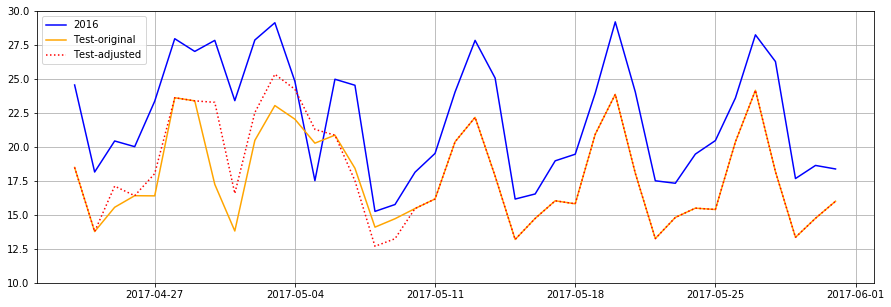

In [23]:
# 2016 Act vs 2017 Pred
pred = pd.DataFrame(sub.groupby(['visit_date'])['pred','visitors'].mean().reset_index()).rename(columns={'visitors':'pred_adj'})

train = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/air_visit_data.csv')[['visit_date','visitors']]
train['visit_date'] = pd.to_datetime(train['visit_date'])
train['visit_date'] = train['visit_date']+timedelta(days=365-1)
df = train[train.visit_date>=date(2017,4,23)]
df = df[df.visit_date<=date(2017,5,31)]
df = pd.DataFrame(df.groupby(['visit_date'])['visitors'].mean().reset_index())

df = df.merge(pred, on='visit_date', how='left')

plt.figure(figsize=(15,5))
plt.plot(df.visit_date, df.visitors, "blue", label = "2016")
plt.plot(df.visit_date, df.pred, "orange", label = "Test-original")
plt.plot(df.visit_date, df.pred_adj, "red", label = "Test-adjusted", linestyle='dotted')
plt.ylim(10,30)
plt.legend(loc='upper left')
plt.grid()